<a href="https://colab.research.google.com/github/abhinav4201/Capstone-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='#FF3206'>Seoul Bike Sharing Demand Prediction**

---

## **Problem Statement** 

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


<center><h2>“Identify your problems, but give your power and energy to solutions.”</h2></center>
<p align=right><b>~ Tony Robbins</b>, American author, coach, speaker, and philanthropist</p><br>

<center><img src="https://drive.google.com/uc?id=1GaFF-s0Q0Ad6XSVAdNTMCehB5-xtb5df" width = "50%" height="360vh"/> </center>

##**Importing Required Libraries**

---

All required libraries are imported at once in order to have smooth workflow. These libraries have used in data manipulation, plotting graphs, modelling etc.

In [1]:
#data visualization libraries(matplotlib,seaborn)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf


# Datetime library for manipulating Date columns.
from datetime import datetime
from datetime import timedelta
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# XGB regressor.
from xgboost import XGBRegressor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

---

In order to proceed, we have to bring in data into the playground. This is basically the raw data which we will filter into features so that it can be used to build the predictive model.

In [80]:
#here google drive is attached to colab so that files can be accessed easily
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Bike Prediction data is stored in google drive as "SeoulBikeData.csv", path for data is stored in a variable
dataPath = "/content/drive/MyDrive/almabetter/Supervised-ML-Regression/Regression-Bike Sharing Demand Prediction/Data/SeoulBikeData.csv"

# the variable(dataPath) is used to load data into the colab notebook using pandas
b_data = pd.read_csv(dataPath)

#there was error while loading data, therefore used excel to convert it into proper file, this can also be
#achieved using pandas by just passing 'encoding = "ISO-8859-1"' with read_csv
#i.e b_data = pd.read_csv(dataPath, encoding = "ISO-8859-1)

##**Studying Data (Data Wrangling)**

---

Basic information about data is studied using head, info, describe function.

In [82]:
#displaying data from file using head function 
b_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


### **Different features and their description**
   
> A feature is an input variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning 
project could use millions of features.

#### **Describing DataSet**

---
<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [83]:
#describing dataset to get Statistical info
b_data.describe().T             #.T is used to transpose the table

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.000,704.602,644.997,0.000,191.000,504.500,1065.250,3556.000
Hour,8760.000,11.500,6.923,0.000,5.750,11.500,17.250,23.000
Temperature(°C),8760.000,12.883,11.945,-17.800,3.500,13.700,22.500,39.400
Humidity(%),8760.000,58.226,20.362,0.000,42.000,57.000,74.000,98.000
Wind speed (m/s),8760.000,1.725,1.036,0.000,0.900,1.500,2.300,7.400
Visibility (10m),8760.000,1436.826,608.299,27.000,940.000,1698.000,2000.000,2000.000
Dew point temperature(°C),8760.000,4.074,13.060,-30.600,-4.700,5.100,14.800,27.200
Solar Radiation (MJ/m2),8760.000,0.569,0.869,0.000,0.000,0.010,0.930,3.520
Rainfall(mm),8760.000,0.149,1.128,0.000,0.000,0.000,0.000,35.000
Snowfall (cm),8760.000,0.075,0.437,0.000,0.000,0.000,0.000,8.800


*   For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

* We may not need to perform extensive data cleansing because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind speed** , **Dew point temperature(°C)**, **Solar Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their **median** (50 percentile) is much **lower** than the **highest value**.

In [84]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [85]:
#@title printing shape of the dataset
print(f'Shape : {b_data.shape} \n' )
b_data.columns

Shape : (8760, 14) 



Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

> * The dataset has total number of 8760 values with 14 different features. Luckily, there are no null values.
> * There are 10 numerical [ 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',  'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' ] and 4 categorial feature ('Date', 'Seasons', 'Holiday', 'Functioning Day').
> * However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp but it has int data type which should also be treated further.

In [86]:
#checking null values for confirmation
b_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [87]:
#checking for duplicates
b_data.duplicated().value_counts()

False    8760
dtype: int64

* **Dataset has 8760 unique value and there is no repetition.**

**Changing Date data type**

In [88]:
#creating copy to keep oringal data safe
df = b_data.copy()

In [89]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

### Extracting date, month, year from date and adding to dataset

In [90]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year

df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year
0,2017-01-12,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Jan,Thursday,2017


In [91]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year
0,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Jan,Thursday,2017


* Here, **hour** feature has numerical value but it explains timestamp, so it should be treated as categorial feature.

In [92]:
# converting hour feature into categorial by changing is type 
df['Hour']=df['Hour'].astype('object')

* Categorial data are those values which can be used to classify information based on similarities.

* Numerical data is the information expressed numerically.

## Exploratory Data Analysis

---
Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using **univariate analysis**, **bivariate analysis** and **multivariate analysis**. 

> What feature will help in achieving stable bike demand every hour?

### **VISUALIZATION**

---

Different form of charts are used to visualize data with respect to bike count (target value), to know how it can be related to other features. Visualization is carried out using **seaborn** and **matplotlib** library.

In [97]:
#creating copy
dfr = df.copy()

In [94]:
#storing numerical feature in separate variable
num_feature = dfr.select_dtypes(exclude='object')
num_feature.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

In [95]:
#storing categorial feature in separate variable
cat_feature = dfr.loc[:,  ~dfr.columns.isin(num_feature.columns.to_list())]
cat_feature.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day'], dtype='object')

#### **Univariate Analysis**

In [115]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    # plt.figure(figsize = (5,5))
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85');
    feature = dfr[col]
    ax = graph.gca()
    ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2,label= 'mean');  #Rose-Red Color indicate mean of data
    ax.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=2,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

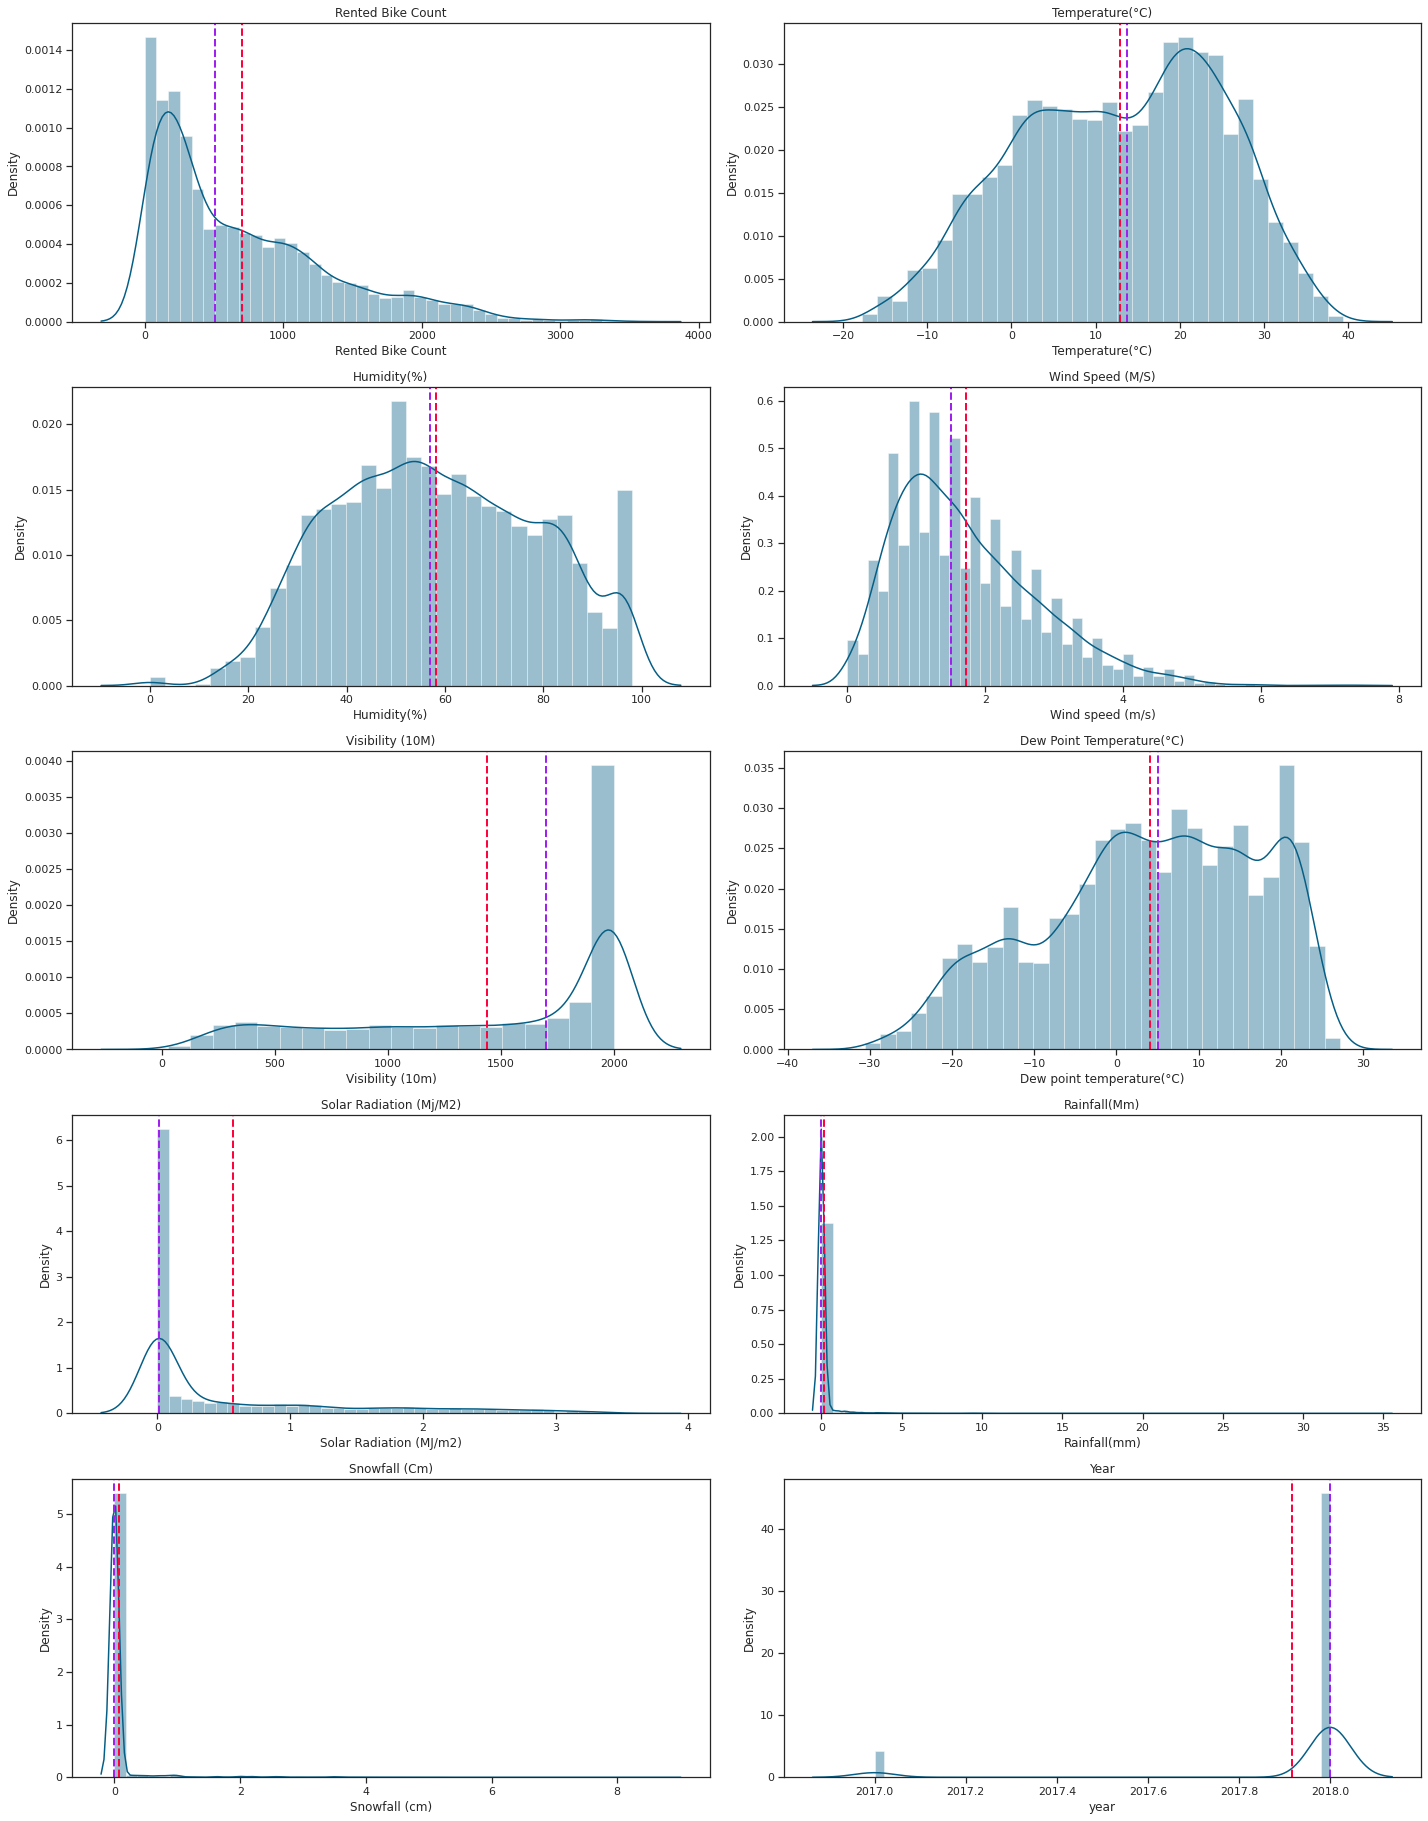

In [116]:
density_plot(dfr,num_feature)

In [117]:
dfr.agg(['skew', 'kurtosis']).T

,skew,kurtosis
Rented Bike Count,1.153,0.853
Hour,0.000,-1.204
Temperature(°C),-0.198,-0.838
Humidity(%),0.060,-0.804
Wind speed (m/s),0.891,0.727
Visibility (10m),-0.702,-0.962
Dew point temperature(°C),-0.367,-0.755
Solar Radiation (MJ/m2),1.504,1.126
Rainfall(mm),14.533,284.991
Snowfall (cm),8.441,93.803


* From the above graph we can summarise that:
  
  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented Bike Count**, **Wind Speed(m/s)**, **Solar Radiation(MJ/m2)**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity(%)**,**Rainfall(mm)**,**Snowfall(cm)**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility(10m)**